In [1]:
# importion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

-1,1:
✨SVM 本质上默认使用标签 -1 和 +1，而不是 0 和 1！
- 我们用的是 sklearn 的 SVC 实现

- 它内部会 自动把标签做映射：0 ➝ -1，1 ➝ +1

- 所以即使你传入的是 y = [0, 1, 1, 0...]，它也能跑！但是真正的数学推导是基于 ±1


In [2]:
# 1️⃣ 构造线性可分数据
np.random.seed(0)
m = 100
X = np.random.randn(m, 2)
true_theta = np.array([2.0, -3.0])
bias = -0.5
logits = X @ true_theta + bias
y = (logits > 0).astype(int)  # 标签 0 / 1

In [3]:
# 2️⃣ 使用 sklearn 训练 SVM
clf = SVC(kernel='linear', C=1.0)  # C 越小越宽容（软间隔）
clf.fit(X, y)

SVC(kernel='linear')

In [4]:
# 3️⃣ 获取超平面参数
w = clf.coef_[0]     # 权重向量 (2,)
b = clf.intercept_[0]  # 偏置项 scalar

<ipython-input-7-8cdb281c54f9>:29: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


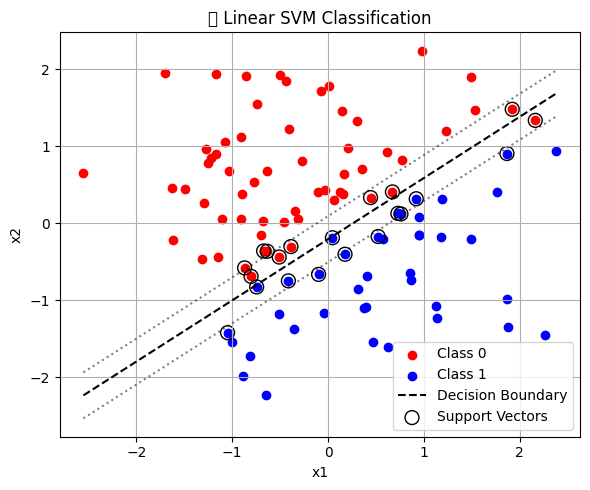

In [7]:
# 4️⃣ 可视化数据 + 决策边界
plt.figure(figsize=(6, 5))


# 原始点
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
# 决策边界: w0*x + w1*y + b = 0 → y = -(w0*x + b)/w1
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]
plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')

# 间隔边界（支持向量边界）
margin = 1 / np.linalg.norm(w)
x2_margin_up = x2_vals + margin
x2_margin_down = x2_vals - margin
plt.plot(x1_vals, x2_margin_up, 'k:', alpha=0.5)
plt.plot(x1_vals, x2_margin_down, 'k:', alpha=0.5)

# 支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')

plt.title("🌟 Linear SVM Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
